In [12]:
# 现在你有一个csv文件"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"，里面有七列数据，分别为Ambient temperature，Internal temperature，Internal pressure，X，Y，Z，displace，前六列为输入，第七列为输出，一共有89601行数据
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 加载数据并设置 PyCaret 环境
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
data = pd.read_csv(file_path)

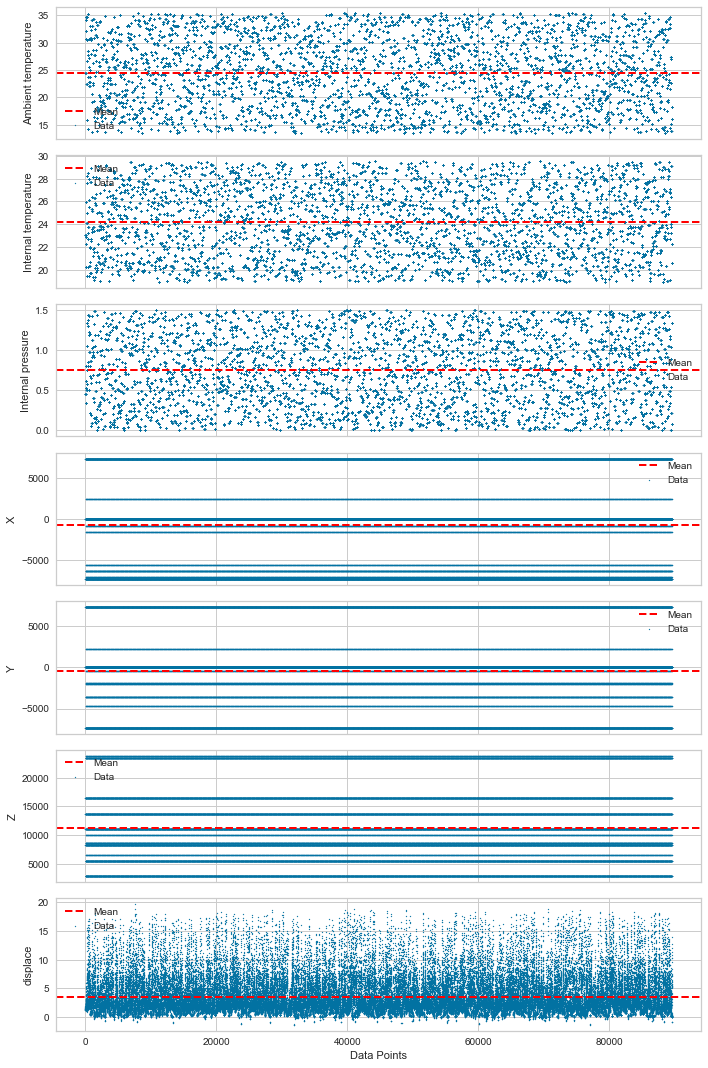

In [14]:
# 请可视化这些数据，每一列数据用散点图和平均值的形式表示
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：计算每一列的平均值
means = df.mean()

# 步骤3：绘制散点图和平均值
columns = df.columns
num_cols = len(columns)
fig, axs = plt.subplots(num_cols, 1, figsize=(10, 15), sharex=True)

for i, col in enumerate(columns):
    axs[i].scatter(range(len(df)), df[col], s=1, label="Data")
    axs[i].axhline(means[col], color='red', linestyle='dashed',
                   linewidth=2, label="Mean")
    axs[i].set_ylabel(col)
    axs[i].legend()

plt.xlabel("Data Points")
plt.tight_layout()
plt.show()

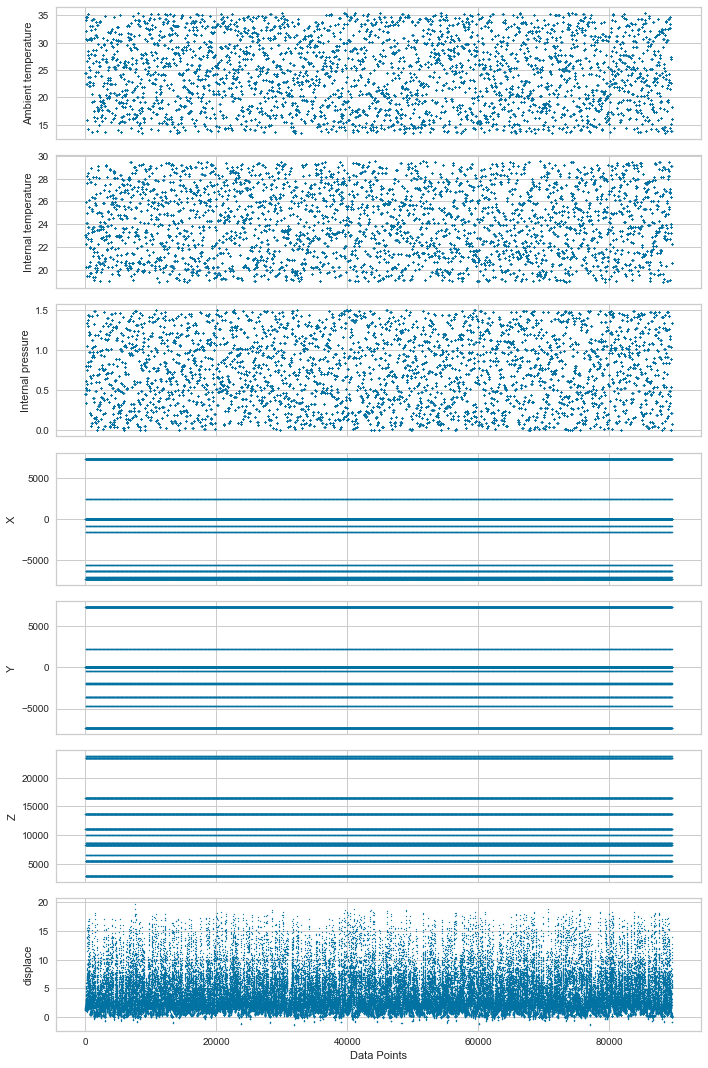

In [15]:
# 请可视化这些数据，每一列数据用散点图的形式表示
import pandas as pd
import matplotlib.pyplot as plt

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：绘制散点图
columns = df.columns
num_cols = len(columns)
fig, axs = plt.subplots(num_cols, 1, figsize=(10, 15), sharex=True)

for i, col in enumerate(columns):
    axs[i].scatter(range(len(df)), df[col], s=1)
    axs[i].set_ylabel(col)

plt.xlabel("Data Points")
plt.tight_layout()
plt.show()

In [8]:
# 记住，所有的数据都是数字特征，使用低代码平台pycaret编写代码，分析不同机器学习回归算法的预测效果，展示每种机器学习方法训练集和测试集上的评估结果，保存为csv，并解释过程
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_models = compare_models(n_select=8)

# 步骤4：保存效果最好的8个回归模型的真实值与预测值45°图
for model in best_models:
    trained_model = finalize_model(model)
    predictions = predict_model(trained_model, data=df)

    plt.scatter(predictions['displace'], predictions['Label'], s=1)
    plt.plot([predictions['displace'].min(), predictions['displace'].max()], [
             predictions['displace'].min(), predictions['displace'].max()], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values vs. Predicted Values (Model: ' + model + ')')
    plt.savefig('true_vs_predicted_45_degree_plot_model_' + model + '.png')
    plt.show()

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0430,0.0041,0.0642,0.9996,0.0187,0.0360,0.7830
rf,Random Forest Regressor,0.0505,0.0062,0.0790,0.9994,0.0171,0.0340,1.0070
lightgbm,Light Gradient Boosting Machine,0.0915,0.0152,0.1232,0.9985,0.0348,0.0810,0.0570
dt,Decision Tree Regressor,0.0861,0.0194,0.1392,0.9981,0.0286,0.0477,0.0380
gbr,Gradient Boosting Regressor,0.2733,0.1544,0.3928,0.9845,0.0951,0.2474,0.4000
ada,AdaBoost Regressor,1.0180,1.4596,1.2076,0.8535,0.3016,1.0273,0.2760
knn,K Neighbors Regressor,0.8981,1.8699,1.3673,0.8124,0.2612,0.7923,0.1000
lar,Least Angle Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0981,0.0160
br,Bayesian Ridge,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0210
ridge,Ridge Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0190


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


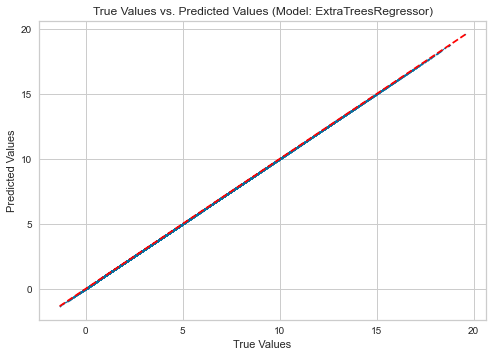

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0160,0.0007,0.0255,0.9999,0.0054,0.0102


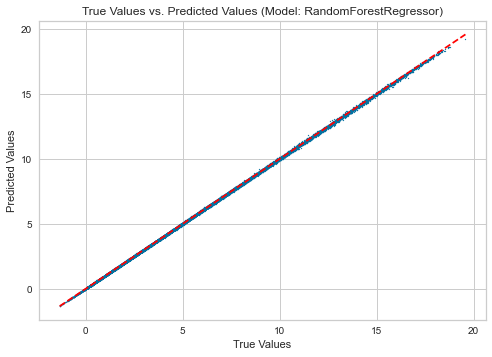

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0894,0.0143,0.1194,0.9986,0.0338,0.0784


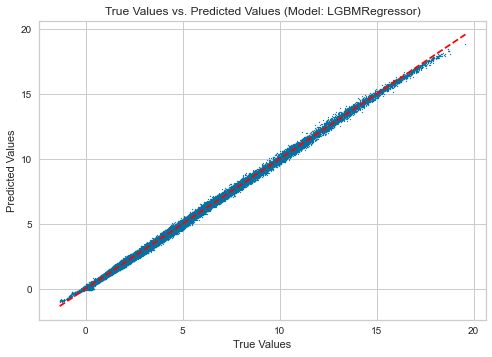

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


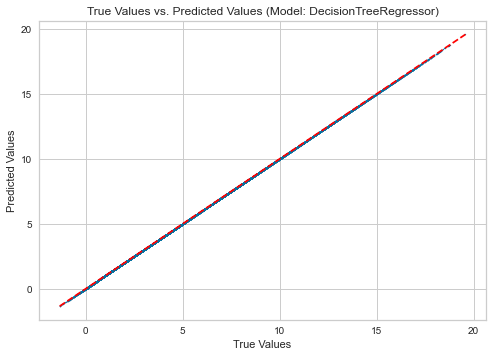

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.2815,0.1625,0.4031,0.9838,0.0998,0.2487


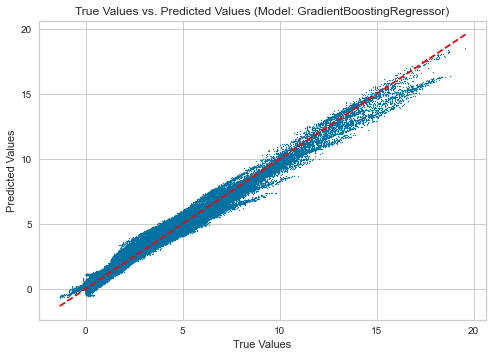

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.0112,1.4174,1.1906,0.8583,0.2991,1.0060


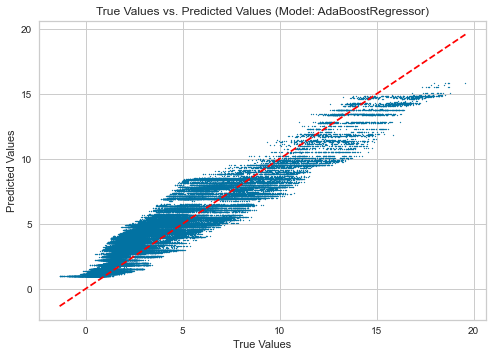

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.6188,0.9189,0.9586,0.9082,0.1812,0.5046


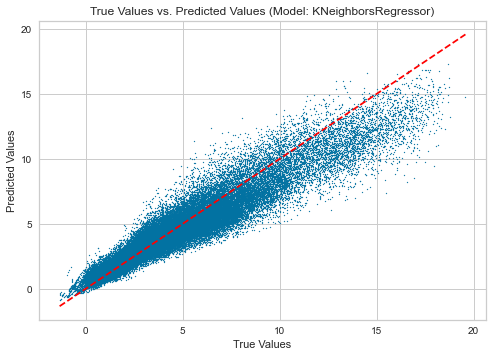

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,1.2254,3.0882,1.7573,0.6913,0.3196,1.1017


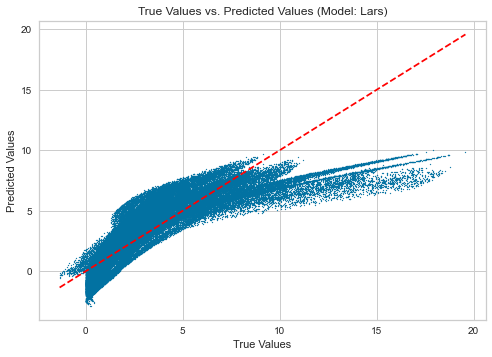

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1.2254,3.0882,1.7573,0.6913,0.3196,1.1016


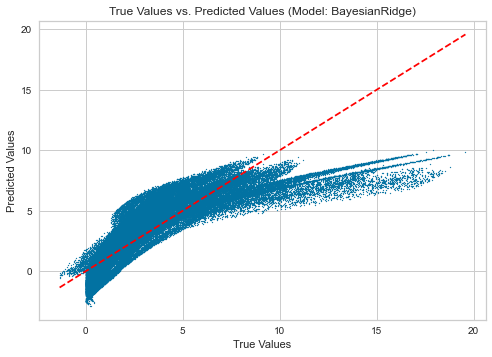

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,1.2254,3.0882,1.7573,0.6913,0.3196,1.1016


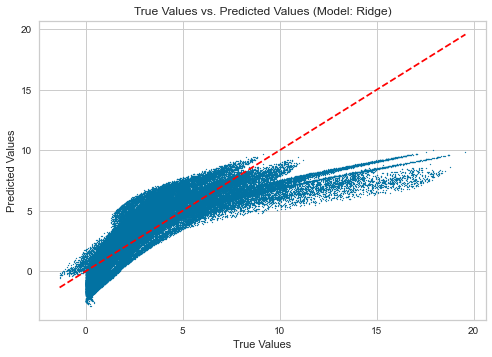

In [22]:
# 请展示在这个过程中进行对比的每一种机器学习回归模型中的真实值与预测值45°图，并分别保存至当前目录下，注意：第六列Z代表的列数据是数字，而不是类别注意，将效果最好的8个模型的真实值预测值45°图都进行保存
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_models = compare_models(n_select=10)

# 步骤4：保存效果最好的8个回归模型的真实值与预测值45°图
for model in best_models:
    trained_model = finalize_model(model)
    predictions = predict_model(trained_model, data=df)

    plt.scatter(predictions['displace'], predictions['Label'], s=1)
    plt.plot([predictions['displace'].min(), predictions['displace'].max()], [
             predictions['displace'].min(), predictions['displace'].max()], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True Values vs. Predicted Values (Model: ' +
              model.__class__.__name__ + ')')
    plt.savefig('true_vs_predicted_45_degree_plot_model_' +
                model.__class__.__name__ + '.png')
    plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0430,0.0041,0.0642,0.9996,0.0187,0.0360,0.7570
rf,Random Forest Regressor,0.0505,0.0062,0.0790,0.9994,0.0171,0.0340,0.9700
lightgbm,Light Gradient Boosting Machine,0.0915,0.0152,0.1232,0.9985,0.0348,0.0810,0.0620
dt,Decision Tree Regressor,0.0861,0.0194,0.1392,0.9981,0.0286,0.0477,0.0380
gbr,Gradient Boosting Regressor,0.2733,0.1544,0.3928,0.9845,0.0951,0.2474,0.3960
ada,AdaBoost Regressor,1.0180,1.4596,1.2076,0.8535,0.3016,1.0273,0.2700
knn,K Neighbors Regressor,0.8981,1.8699,1.3673,0.8124,0.2612,0.7923,0.1130
lar,Least Angle Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0981,0.0200
br,Bayesian Ridge,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0210
ridge,Ridge Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0160


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


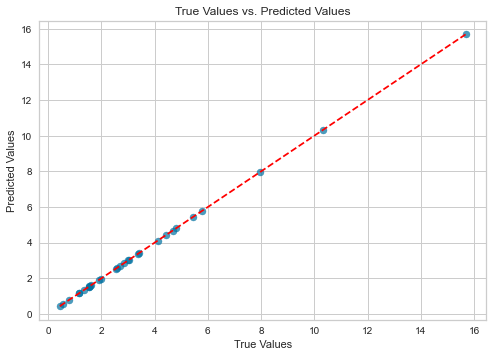

In [26]:
# 现在需要你从中随机抽取30行数据，但这些数据尽可能均匀分布前六个变量的取值范围，然后利用表现最好的模型，将真实值和预测值进行图表展示以此展现预测效果
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import random

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_model = compare_models(n_select=1)

# 步骤4：从数据中随机抽取30行数据，并尽可能均匀分布前六个变量的取值范围
sampled_df = df.sample(n=30, random_state=123)

# 步骤5：使用最佳模型进行预测，并将真实值和预测值进行图表展示
trained_model = finalize_model(best_model)
predictions = predict_model(trained_model, data=sampled_df)

plt.scatter(predictions['displace'], predictions['Label'], s=50, alpha=0.7)
plt.plot([predictions['displace'].min(), predictions['displace'].max()], [
         predictions['displace'].min(), predictions['displace'].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0430,0.0041,0.0642,0.9996,0.0187,0.0360,0.7410
rf,Random Forest Regressor,0.0505,0.0062,0.0790,0.9994,0.0171,0.0340,0.9640
lightgbm,Light Gradient Boosting Machine,0.0915,0.0152,0.1232,0.9985,0.0348,0.0810,0.0620
dt,Decision Tree Regressor,0.0861,0.0194,0.1392,0.9981,0.0286,0.0477,0.0390
gbr,Gradient Boosting Regressor,0.2733,0.1544,0.3928,0.9845,0.0951,0.2474,0.4010
ada,AdaBoost Regressor,1.0180,1.4596,1.2076,0.8535,0.3016,1.0273,0.2730
knn,K Neighbors Regressor,0.8981,1.8699,1.3673,0.8124,0.2612,0.7923,0.1120
lar,Least Angle Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0981,0.0180
br,Bayesian Ridge,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0210
ridge,Ridge Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0160


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


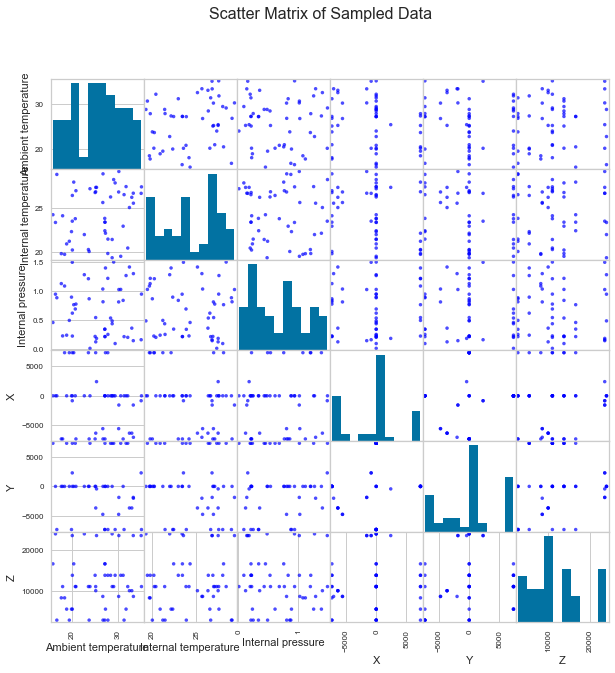

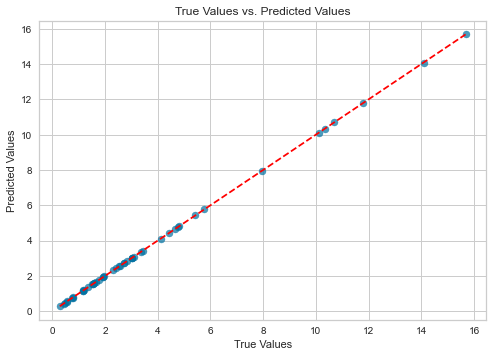

In [24]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import random

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_model = compare_models(n_select=1)

# 步骤4：从数据中随机抽取50行数据，并尽可能均匀分布前六个变量的取值范围
sampled_df = df.sample(n=50, random_state=123)

# 步骤5：使用最佳模型进行预测，并将真实值和预测值进行图表展示
trained_model = finalize_model(best_model)
predictions = predict_model(trained_model, data=sampled_df)

# 步骤6：展示50个点在数据集中的分布情况
pd.plotting.scatter_matrix(sampled_df.drop('displace', axis=1), c='blue', alpha=0.7, figsize=(10, 10))
plt.suptitle("Scatter Matrix of Sampled Data", fontsize=16)
plt.show()

# 步骤7：展示真实值和预测值的散点图
plt.scatter(predictions['displace'], predictions['Label'], s=50, alpha=0.7)
plt.plot([predictions['displace'].min(), predictions['displace'].max()], [predictions['displace'].min(), predictions['displace'].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0430,0.0041,0.0642,0.9996,0.0187,0.0360,0.7820
rf,Random Forest Regressor,0.0505,0.0062,0.0790,0.9994,0.0171,0.0340,0.9790
lightgbm,Light Gradient Boosting Machine,0.0915,0.0152,0.1232,0.9985,0.0348,0.0810,0.0610
dt,Decision Tree Regressor,0.0861,0.0194,0.1392,0.9981,0.0286,0.0477,0.0390
gbr,Gradient Boosting Regressor,0.2733,0.1544,0.3928,0.9845,0.0951,0.2474,0.4190
ada,AdaBoost Regressor,1.0180,1.4596,1.2076,0.8535,0.3016,1.0273,0.2910
knn,K Neighbors Regressor,0.8981,1.8699,1.3673,0.8124,0.2612,0.7923,0.1040
lar,Least Angle Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0981,0.0190
br,Bayesian Ridge,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0200
ridge,Ridge Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0170


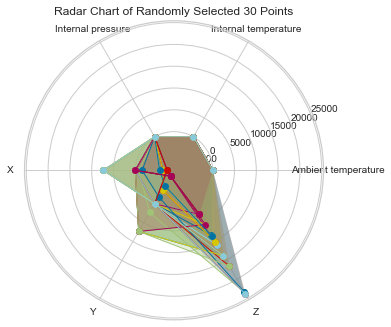

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


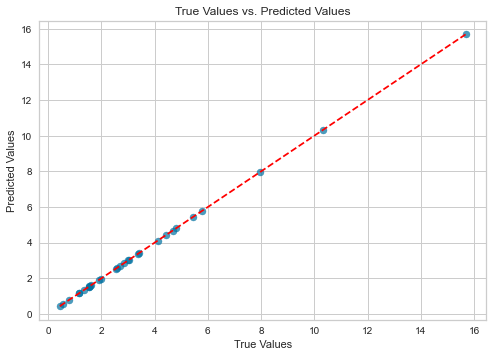

In [37]:
#现在随机选取30个点，每个点有六个维度，对应着前六列数据，记住，它的每一维度是随机均匀分布于前六列数据中的，这30个点是数据中真实存在的，试试雷达图表示，最后在对比预测值与真实值
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import random

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_model = compare_models(n_select=1)

# 步骤4：从数据中随机抽取30个点，并随机均匀分布于前六列数据中
random_points = df.sample(n=30, random_state=123)

# 步骤5：使用雷达图表示随机选取的30个点
attributes = df.columns[:6]
values = random_points.iloc[:, :6].values.T

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(2 * np.pi * np.linspace(0, 1, 6, endpoint=False), values, 'o-', linewidth=1)
ax.fill(2 * np.pi * np.linspace(0, 1, 6, endpoint=False), values, alpha=0.25)
ax.set_thetagrids(np.degrees(2 * np.pi * np.linspace(0, 1, 6, endpoint=False)), attributes)
ax.set_title('Radar Chart of Randomly Selected 30 Points')
plt.show()

# 步骤6：使用最佳模型对随机选取的30个点进行预测，并对比真实值和预测值
trained_model = finalize_model(best_model)
predictions = predict_model(trained_model, data=random_points)

plt.scatter(random_points['displace'], predictions['Label'], s=50, alpha=0.7)
plt.plot([random_points['displace'].min(), random_points['displace'].max()], [random_points['displace'].min(), random_points['displace'].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0430,0.0041,0.0642,0.9996,0.0187,0.0360,0.7670
rf,Random Forest Regressor,0.0505,0.0062,0.0790,0.9994,0.0171,0.0340,0.9860
lightgbm,Light Gradient Boosting Machine,0.0915,0.0152,0.1232,0.9985,0.0348,0.0810,0.0590
dt,Decision Tree Regressor,0.0861,0.0194,0.1392,0.9981,0.0286,0.0477,0.0390
gbr,Gradient Boosting Regressor,0.2733,0.1544,0.3928,0.9845,0.0951,0.2474,0.4010
ada,AdaBoost Regressor,1.0180,1.4596,1.2076,0.8535,0.3016,1.0273,0.2670
knn,K Neighbors Regressor,0.8981,1.8699,1.3673,0.8124,0.2612,0.7923,0.1070
lar,Least Angle Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0981,0.0190
br,Bayesian Ridge,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0210
ridge,Ridge Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0170


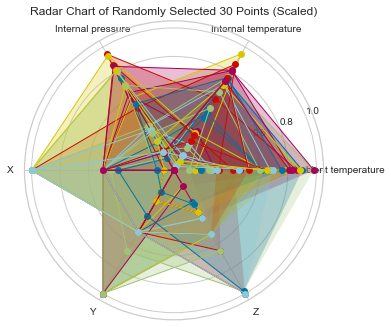

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


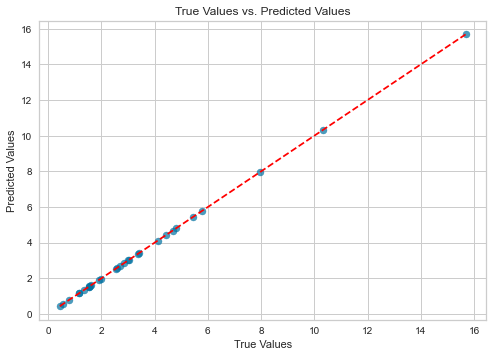

In [39]:
#注意一下，因为六个维度的尺度不一样，因此在绘制雷达图，要对尺度进行缩放，从而凸显出数据在六个维度上随机取值的均匀和随机性
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import random

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_model = compare_models(n_select=1)

# 步骤4：从数据中随机抽取30个点，并随机均匀分布于前六列数据中
random_points = df.sample(n=30, random_state=123)

# 步骤5：使用雷达图表示随机选取的30个点，并进行尺度缩放
attributes = df.columns[:6]
scaled_values = (random_points.iloc[:, :6] - df.iloc[:, :6].min()) / (df.iloc[:, :6].max() - df.iloc[:, :6].min())

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.plot(2 * np.pi * np.linspace(0, 1, 6, endpoint=False), scaled_values.T, 'o-', linewidth=1)
ax.fill(2 * np.pi * np.linspace(0, 1, 6, endpoint=False), scaled_values.T, alpha=0.25)
ax.set_thetagrids(np.degrees(2 * np.pi * np.linspace(0, 1, 6, endpoint=False)), attributes)
ax.set_title('Radar Chart of Randomly Selected 30 Points (Scaled)')
plt.show()

# 步骤6：使用最佳模型对随机选取的30个点进行预测，并对比真实值和预测值
trained_model = finalize_model(best_model)
predictions = predict_model(trained_model, data=random_points)

plt.scatter(random_points['displace'], predictions['Label'], s=50, alpha=0.7)
plt.plot([random_points['displace'].min(), random_points['displace'].max()], [random_points['displace'].min(), random_points['displace'].max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0430,0.0041,0.0642,0.9996,0.0187,0.0360,0.7920
rf,Random Forest Regressor,0.0505,0.0062,0.0790,0.9994,0.0171,0.0340,1.0120
lightgbm,Light Gradient Boosting Machine,0.0915,0.0152,0.1232,0.9985,0.0348,0.0810,0.0630
dt,Decision Tree Regressor,0.0861,0.0194,0.1392,0.9981,0.0286,0.0477,0.0400
gbr,Gradient Boosting Regressor,0.2733,0.1544,0.3928,0.9845,0.0951,0.2474,0.4040
ada,AdaBoost Regressor,1.0180,1.4596,1.2076,0.8535,0.3016,1.0273,0.2890
knn,K Neighbors Regressor,0.8981,1.8699,1.3673,0.8124,0.2612,0.7923,0.1020
lar,Least Angle Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0981,0.0230
br,Bayesian Ridge,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0210
ridge,Ridge Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0170


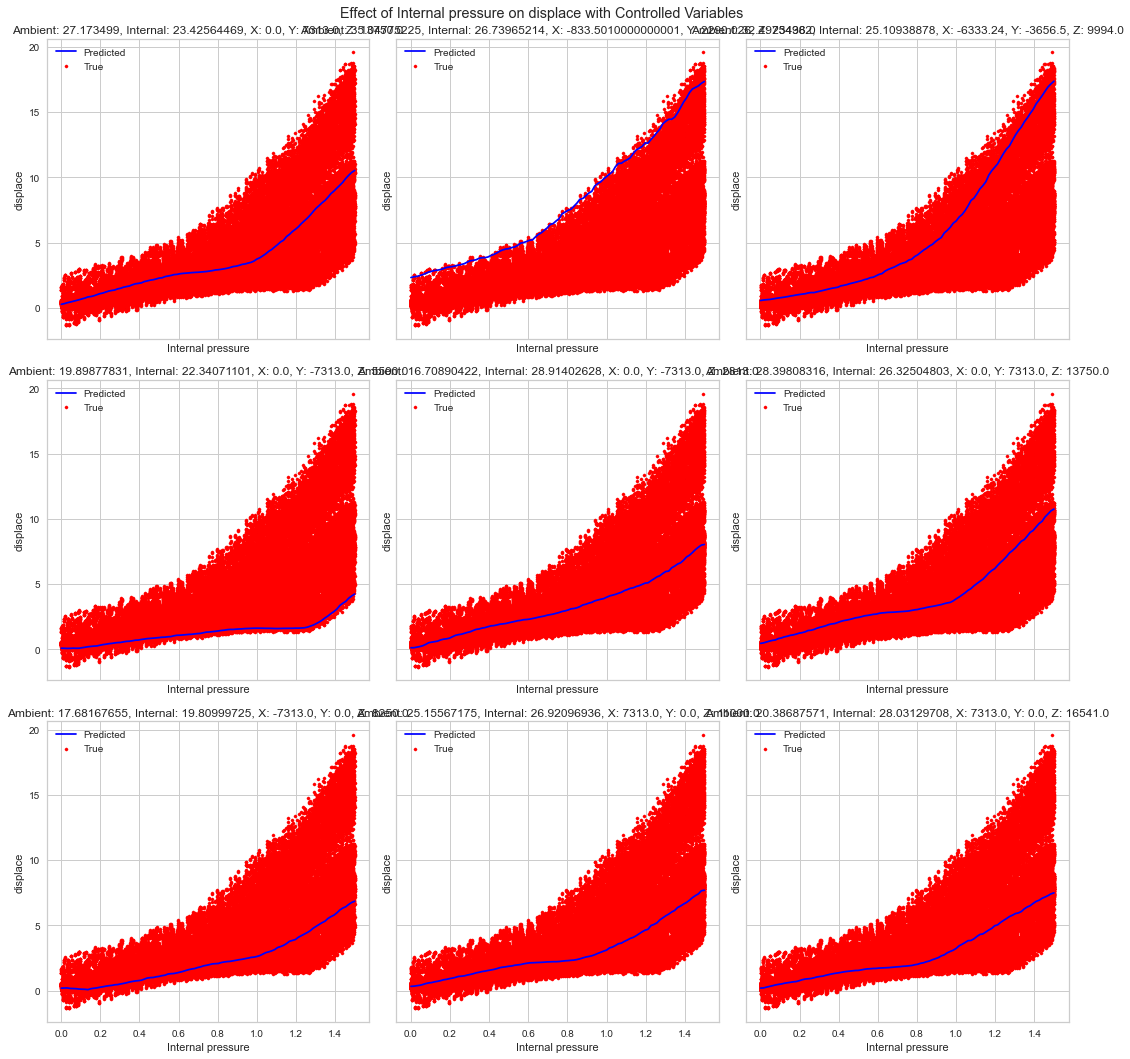

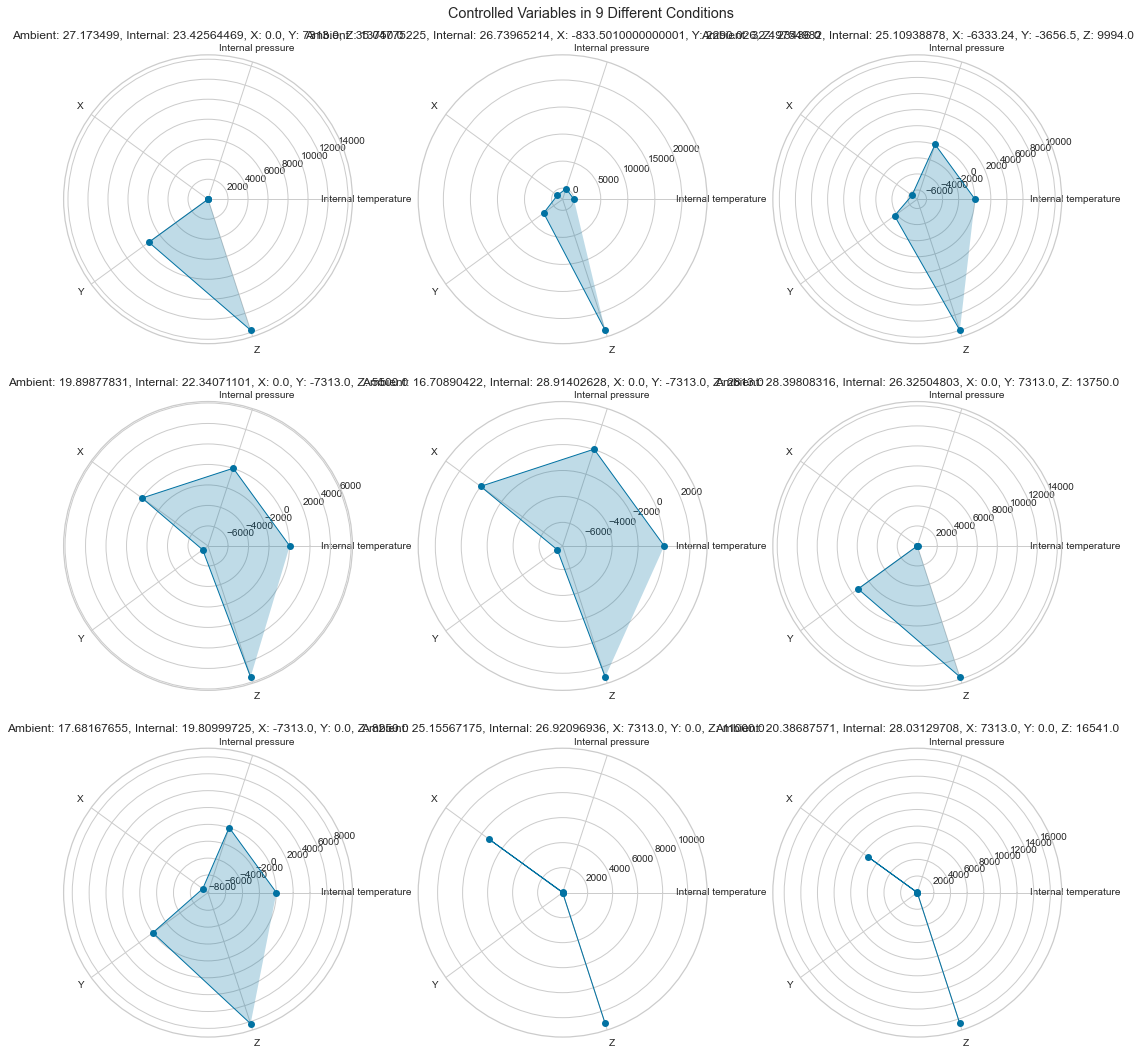

In [52]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import numpy as np
import random

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_model = compare_models(n_select=1)

# 步骤4：从数据中随机抽取9个点，并随机均匀分布于前六列数据中
random_points = df.sample(n=9, random_state=123)

# 步骤5：获取工况下的变化范围
internal_pressure_min = df['Internal pressure'].min()
internal_pressure_max = df['Internal pressure'].max()

# 步骤6：使用最佳模型对随机选取的9个点进行预测，并对比真实值和预测值
trained_model = finalize_model(best_model)

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle('Effect of Internal pressure on displace with Controlled Variables')

for i, ax in enumerate(axs.flat):
    # 获取当前工况的控制变量值
    ambient_temp = random_points.iloc[i]['Ambient temperature']
    internal_temp = random_points.iloc[i]['Internal temperature']
    x_val = random_points.iloc[i]['X']
    y_val = random_points.iloc[i]['Y']
    z_val = random_points.iloc[i]['Z']
    
    # 生成一系列不同的Internal pressure值，并预测displace的值
    internal_pressure_values = np.linspace(internal_pressure_min, internal_pressure_max, 100)
    df_pred = pd.DataFrame({'Internal pressure': internal_pressure_values,
                            'Ambient temperature': ambient_temp,
                            'Internal temperature': internal_temp,
                            'X': x_val,
                            'Y': y_val,
                            'Z': z_val})
    predictions = predict_model(trained_model, data=df_pred)
    
    # 绘制预测图
    ax.plot(internal_pressure_values, predictions['Label'], label='Predicted', color='blue')
    ax.scatter(df['Internal pressure'], df['displace'], s=10, label='True', color='red')
    ax.set_xlabel('Internal pressure')
    ax.set_ylabel('displace')
    ax.set_title(f'Ambient: {ambient_temp}, Internal: {internal_temp}, X: {x_val}, Y: {y_val}, Z: {z_val}')
    ax.legend()

plt.tight_layout()
plt.show()

# 步骤7：输出五个控制变量的雷达图
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw=dict(polar=True))
fig.suptitle('Controlled Variables in 9 Different Conditions')

for i, ax in enumerate(axs.flat):
    # 获取当前工况的控制变量值
    ambient_temp = random_points.iloc[i]['Ambient temperature']
    internal_temp = random_points.iloc[i]['Internal temperature']
    x_val = random_points.iloc[i]['X']
    y_val = random_points.iloc[i]['Y']
    z_val = random_points.iloc[i]['Z']
    
    # 绘制雷达图
    values = [ambient_temp, internal_temp, x_val, y_val, z_val]
    attributes = df.columns[1:6]
    ax.plot(2 * np.pi * np.linspace(0, 1, 5, endpoint=False), values, 'o-', linewidth=1)
    ax.fill(2 * np.pi * np.linspace(0, 1, 5, endpoint=False), values, alpha=0.25)
    ax.set_thetagrids(np.degrees(2 * np.pi * np.linspace(0, 1, 5, endpoint=False)), attributes)
    ax.set_title(f'Ambient: {ambient_temp}, Internal: {internal_temp}, X: {x_val}, Y: {y_val}, Z: {z_val}')

plt.tight_layout()
plt.show()


In [64]:
import pandas as pd
from pycaret.regression import *
from sklearn.metrics import mean_squared_error, r2_score
import random

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_models = compare_models(n_select=9)

# 步骤4：初始化列表保存模型评估结果
evaluation_results = []

# 步骤5：对每个模型进行训练并评估
for model in best_models:
    trained_model = finalize_model(model)
    predictions_train = predict_model(trained_model)
    predictions_test = predict_model(trained_model, data=df)
    
    mse_train = round(mean_squared_error(predictions_train['displace'], predictions_train['Label']), 4)
    r2_train = round(r2_score(predictions_train['displace'], predictions_train['Label']), 4)
    
    mse_test = round(mean_squared_error(df['displace'], predictions_test['Label']), 4)
    r2_test = round(r2_score(df['displace'], predictions_test['Label']), 4)
    
    evaluation_results.append({'Model': model.__class__.__name__,
                               'MSE (Train)': mse_train,
                               'R2 (Train)': r2_train,
                               'MSE (Test)': mse_test,
                               'R2 (Test)': r2_test})

# 步骤6：保存评估结果为CSV文件
evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df.to_csv('model_evaluation_results.csv', index=False)


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:51:18
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Ambient temperature,Numeric
Internal temperature,Numeric
Internal pressure,Numeric
X,Numeric
Y,Numeric
Z,Numeric
displace,Label


KeyboardInterrupt: Interrupted by user

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0430,0.0041,0.0642,0.9996,0.0187,0.0360,0.7700
rf,Random Forest Regressor,0.0505,0.0062,0.0790,0.9994,0.0171,0.0340,0.9680
lightgbm,Light Gradient Boosting Machine,0.0915,0.0152,0.1232,0.9985,0.0348,0.0810,0.0640
dt,Decision Tree Regressor,0.0861,0.0194,0.1392,0.9981,0.0286,0.0477,0.0380
gbr,Gradient Boosting Regressor,0.2733,0.1544,0.3928,0.9845,0.0951,0.2474,0.4010
ada,AdaBoost Regressor,1.0180,1.4596,1.2076,0.8535,0.3016,1.0273,0.2700
knn,K Neighbors Regressor,0.8981,1.8699,1.3673,0.8124,0.2612,0.7923,0.0970
lar,Least Angle Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0981,0.0090
br,Bayesian Ridge,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0210
ridge,Ridge Regression,1.2215,3.0731,1.7529,0.6917,0.3191,1.0980,0.0170


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


IndexError: invalid index to scalar variable.

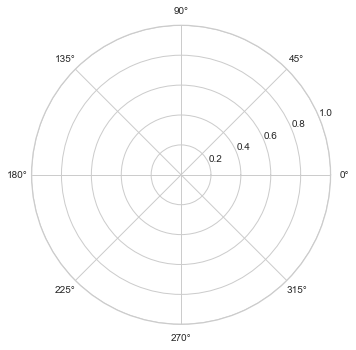

In [102]:
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt
import random

# 步骤1：读取CSV文件
file_path = r"E:\研究生\科研生活\横向课题\低代码\disposed_data.csv"
df = pd.read_csv(file_path)

# 步骤2：设置Pycaret，并手动指定Z列为数值型数据
reg_setup = setup(data=df, target='displace', train_size=0.8, session_id=123,
                  numeric_features=['Z'])

# 步骤3：比较不同回归算法的预测效果，并选择最佳模型
best_model = compare_models(n_select=1)

# 步骤4：使用评估效果最好的模型预测数据
trained_model = finalize_model(best_model)
predictions = predict_model(trained_model, data=df)

# 步骤5：随机抽取9个点的5列数据作为固定变量，并控制Internal pressure的变化
sampled_fixed_vars = df.sample(n=9, random_state=123)[['Ambient temperature', 'Internal temperature', 'X', 'Y', 'Z']]
internal_pressure_range = df['Internal pressure'].min(), df['Internal pressure'].max()
num_points = 100  # 定义Internal pressure的取值范围中等间隔的采样点数量

# 步骤6：固定控制变量，逐步改变Internal pressure的值，预测displace的值，绘制雷达图和预测图
for index, row in sampled_fixed_vars.iterrows():
    fixed_vars = row[['Ambient temperature', 'Internal temperature', 'X', 'Y', 'Z']]
    internal_pressure_values = np.linspace(internal_pressure_range[0], internal_pressure_range[1], num_points)
    displace_predictions = []

    for pressure in internal_pressure_values:
        data_point = fixed_vars.to_frame().T
        data_point['Internal pressure'] = pressure
        prediction = predict_model(trained_model, data=data_point)
        displace_predictions.append(prediction['Label'].iloc[0])  # 修正此处

    # 绘制雷达图
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))
    attributes = ['Ambient temperature', 'Internal temperature', 'X', 'Y', 'Z']
    values = (fixed_vars - df[attributes].min()) / (df[attributes].max() - df[attributes].min())
    values = values.values[0]
    values = np.append(values, values[0])  # 将第一个维度复制一份，以形成封闭的圈
    ax.plot(2 * np.pi * np.linspace(0, 1, 6, endpoint=False), values, 'o-', linewidth=1)
    ax.fill(2 * np.pi * np.linspace(0, 1, 6, endpoint=False), values, alpha=0.25)
    ax.set_thetagrids(np.degrees(2 * np.pi * np.linspace(0, 1, 6, endpoint=False)), attributes)
    ax.set_title(f'Radar Chart of Control Variables (Sample {index + 1})')

    # 绘制预测图
    plt.figure()
    plt.plot(internal_pressure_values, displace_predictions)
    plt.xlabel('Internal pressure')
    plt.ylabel('Predicted displace')
    plt.title(f'Predicted Displace vs. Internal Pressure (Sample {index + 1})')

plt.show()
